In [1]:
using NeuralPDE, Lux, ModelingToolkit, Optimization, OptimizationOptimisers
import ModelingToolkit: Interval, infimum, supremum

@parameters t, x
@variables u(..)
Dxx = Differential(x)^2
Dtt = Differential(t)^2
Dt = Differential(t)

#2D PDE
C=1
eq  = Dtt(u(t,x)) ~ C^2*Dxx(u(t,x))

# Initial and boundary conditions
bcs = [u(t,0) ~ 0.,# for all t > 0
       u(t,1) ~ 0.,# for all t > 0
       u(0,x) ~ x*(1. - x), #for all 0 < x < 1
       Dt(u(0,x)) ~ 0. ] #for all  0 < x < 1]

# Space and time domains
domains = [t ∈ IntervalDomain(0.0,1.0),
           x ∈ IntervalDomain(0.0,1.0)]
# Discretization
dx = 0.1
loss = []

# Neural network
dim = 2 # number of dimensions
chain = Lux.Chain(Dense(dim, 16, Lux.σ), Dense(16, 16, Lux.σ), Dense(16, 1))

discretization = PhysicsInformedNN(chain, QuadratureTraining())

@named pde_system = PDESystem(eq, bcs, domains, [t, x], [u(t, x)])
prob = discretize(pde_system, discretization)
loss = []
callback = function (p, l)
    println("Current loss is: $l")
    push!(loss, l)
    return false
end

res = Optimization.solve(prob, ADAM(0.1); callback = callback, maxiters = 4000)
prob = remake(prob, u0 = res.minimizer)
res = Optimization.solve(prob, ADAM(0.01); callback = callback, maxiters = 2000)
phi = discretization.phi

Current loss is: 21.652625497138835
Current loss is: 64.90361240520575
Current loss is: 24.870624973226022
Current loss is: 0.3205920414465111
Current loss is: 12.898881870813582
Current loss is: 21.451520803988696
Current loss is: 14.113946819972947
Current loss is: 4.382673538001896
Current loss is: 0.34378920560797216
Current loss is: 1.6177374716985333
Current loss is: 4.652584809558787
Current loss is: 6.525270397354682
Current loss is: 6.259925224022673
Current loss is: 4.46514281650906
Current loss is: 2.328401440846831
Current loss is: 0.8008547493378063
Current loss is: 0.2643101576986627
Current loss is: 0.5820237752776168
Current loss is: 1.3283114102993068
Current loss is: 2.038970296541118
Current loss is: 2.393969419819949
Current loss is: 2.2942794342575175
Current loss is: 1.837274945995469
Current loss is: 1.229147789663115
Current loss is: 0.6842036037199344
Current loss is: 0.34926995250317455
Current loss is: 0.27023669623946084
Current loss is: 0.39936548924612364


Current loss is: 0.2510657628304975
Current loss is: 0.25099974400370584
Current loss is: 0.2509334670521735
Current loss is: 0.25086693522510095
Current loss is: 0.2508001516868259
Current loss is: 0.25073311896541206
Current loss is: 0.2506658403152003
Current loss is: 0.25059831867507437
Current loss is: 0.25053055753181847
Current loss is: 0.2504625603838386
Current loss is: 0.25039433111016796
Current loss is: 0.25032587342583257
Current loss is: 0.2502571905071431
Current loss is: 0.2501882863420545
Current loss is: 0.25011916466156153
Current loss is: 0.25004982986748797
Current loss is: 0.24998028569264455
Current loss is: 0.24991053663321078
Current loss is: 0.2498405868988811
Current loss is: 0.24977044070101045
Current loss is: 0.24970010220735228
Current loss is: 0.24962957613974326
Current loss is: 0.24955886689487347
Current loss is: 0.24948797906867345
Current loss is: 0.24941691705952104
Current loss is: 0.24934568577180724
Current loss is: 0.24927428943968827
Current l

Current loss is: 0.2365531298501466
Current loss is: 0.2365178706623888
Current loss is: 0.23648287415188007
Current loss is: 0.23644813469490597
Current loss is: 0.23641364611899424
Current loss is: 0.2363794033426773
Current loss is: 0.23634539790713366
Current loss is: 0.23631162685557933
Current loss is: 0.23627808279580376
Current loss is: 0.2362447582365505
Current loss is: 0.23621164843283363
Current loss is: 0.23617874693363158
Current loss is: 0.2361460480549065
Current loss is: 0.23611354385396202
Current loss is: 0.23608123028342295
Current loss is: 0.2360490984461609
Current loss is: 0.23601714389639664
Current loss is: 0.235985359780061
Current loss is: 0.23595373978898168
Current loss is: 0.23592227659835924
Current loss is: 0.23589096599363443
Current loss is: 0.2358597983388572
Current loss is: 0.23582877050843778
Current loss is: 0.2357978734423585
Current loss is: 0.23576710212044752
Current loss is: 0.23573644905058333
Current loss is: 0.23570590831399074
Current los

Current loss is: 0.21724167442824802
Current loss is: 0.2169641569022479
Current loss is: 0.21667923767982059
Current loss is: 0.2163868777080026
Current loss is: 0.21608709249064947
Current loss is: 0.21577995001010797
Current loss is: 0.21546557587241127
Current loss is: 0.21514415413793778
Current loss is: 0.21481592898038845
Current loss is: 0.2144811995351053
Current loss is: 0.21414032004807804
Current loss is: 0.21379368980663635
Current loss is: 0.21344174552989018
Current loss is: 0.2130849499961881
Current loss is: 0.21272377810191404
Current loss is: 0.21235870249366645
Current loss is: 0.2119901753334712
Current loss is: 0.2116186124814033
Current loss is: 0.2112443747907244
Current loss is: 0.21086775501874602
Current loss is: 0.2104889625190436
Current loss is: 0.2101081163994166
Current loss is: 0.20972524135445555
Current loss is: 0.20934025891109406
Current loss is: 0.20895300464806082
Current loss is: 0.20856322959786486
Current loss is: 0.20817061825467312
Current lo

Current loss is: 0.0923896832816855
Current loss is: 0.09149302801675405
Current loss is: 0.09059846630929481
Current loss is: 0.08970690764304291
Current loss is: 0.08881931255899829
Current loss is: 0.08793670131766823
Current loss is: 0.08706014991471535
Current loss is: 0.08619081692792974
Current loss is: 0.08532991476118308
Current loss is: 0.08447870930847833
Current loss is: 0.08363848373004436
Current loss is: 0.08281050095644804
Current loss is: 0.08199593904948797
Current loss is: 0.08119581972943958
Current loss is: 0.08041093895414249
Current loss is: 0.07964178508232869
Current loss is: 0.07888847139157604
Current loss is: 0.07815069914386483
Current loss is: 0.07742773667404712
Current loss is: 0.07671846988856341
Current loss is: 0.07602145692805493
Current loss is: 0.07533506575001522
Current loss is: 0.07465761313720501
Current loss is: 0.07398753061114371
Current loss is: 0.07332351480954186
Current loss is: 0.07266465513467456
Current loss is: 0.07201050200577734
Cu

Current loss is: 0.04268395795576536
Current loss is: 0.04270385555659342
Current loss is: 0.04246986635662419
Current loss is: 0.042466890064055386
Current loss is: 0.0425522270721584
Current loss is: 0.042408263190703885
Current loss is: 0.04230816960728101
Current loss is: 0.042375111369680966
Current loss is: 0.04232818827632845
Current loss is: 0.042200433857237145
Current loss is: 0.042202710847666094
Current loss is: 0.042214361205958194
Current loss is: 0.04211786995141058
Current loss is: 0.04205940675718624
Current loss is: 0.042074319968205015
Current loss is: 0.042030136528020755
Current loss is: 0.04194980959763601
Current loss is: 0.041930813760622146
Current loss is: 0.04192007510124691
Current loss is: 0.04185733182748055
Current loss is: 0.04180512743576875
Current loss is: 0.04179219492618693
Current loss is: 0.04175903569179284
Current loss is: 0.04170032348668922
Current loss is: 0.04166499488885668
Current loss is: 0.041644514829948895
Current loss is: 0.0416015246

Current loss is: 0.03293535365920332
Current loss is: 0.03286243677782954
Current loss is: 0.03280181198872446
Current loss is: 0.032755987739128196
Current loss is: 0.03272085919363871
Current loss is: 0.03268721054596942
Current loss is: 0.03264737555957384
Current loss is: 0.032599157754805264
Current loss is: 0.03254376343367511
Current loss is: 0.032484972609358835
Current loss is: 0.03242740340031732
Current loss is: 0.03237350078421598
Current loss is: 0.032323927613131125
Current loss is: 0.032278318667487024
Current loss is: 0.0322347882258233
Current loss is: 0.0321917145511559
Current loss is: 0.032148078335148336
Current loss is: 0.032103008443722186
Current loss is: 0.03205637295806299
Current loss is: 0.03200853232206573
Current loss is: 0.0319597186544487
Current loss is: 0.0319103354883986
Current loss is: 0.03186088086093518
Current loss is: 0.031811489614868876
Current loss is: 0.03176239807748417
Current loss is: 0.03171382525141339
Current loss is: 0.031665877565114

Current loss is: 0.023825593752620305
Current loss is: 0.023765633551936376
Current loss is: 0.02371558677336594
Current loss is: 0.023670780019797225
Current loss is: 0.02362561648570078
Current loss is: 0.023576062966092444
Current loss is: 0.023521076203746768
Current loss is: 0.023461687143214498
Current loss is: 0.023400268267760843
Current loss is: 0.02333886937645912
Current loss is: 0.02327907067526728
Current loss is: 0.023221383422515195
Current loss is: 0.023165786059636418
Current loss is: 0.0231118371614933
Current loss is: 0.023059020970015002
Current loss is: 0.023006965671017093
Current loss is: 0.022955403803290524
Current loss is: 0.022904445824461793
Current loss is: 0.022854263037769815
Current loss is: 0.022805542445610994
Current loss is: 0.022759164219809662
Current loss is: 0.02271691082446148
Current loss is: 0.022681559860517144
Current loss is: 0.022658207799833657
Current loss is: 0.02265600371902623
Current loss is: 0.02269147168414737
Current loss is: 0.02

Current loss is: 0.05319445700198583
Current loss is: 0.06734335019824117
Current loss is: 0.03523415005624381
Current loss is: 0.06769398174231096
Current loss is: 0.029812266289641322
Current loss is: 0.06089604607956923
Current loss is: 0.03082508425511193
Current loss is: 0.050566832960920245
Current loss is: 0.0342807853495639
Current loss is: 0.0407244868049197
Current loss is: 0.03762296329646931
Current loss is: 0.03285767408414505
Current loss is: 0.039138608007842184
Current loss is: 0.02781666443336458
Current loss is: 0.038210874456513444
Current loss is: 0.025724391454517263
Current loss is: 0.03523991359931786
Current loss is: 0.02594684953038049
Current loss is: 0.03088463305064402
Current loss is: 0.027351261609498786
Current loss is: 0.02658020123216108
Current loss is: 0.0284347793928229
Current loss is: 0.02369034772733163
Current loss is: 0.028105548752007138
Current loss is: 0.02283966024324084
Current loss is: 0.026083794884161047
Current loss is: 0.02353767839474

Current loss is: 0.012445887611344983
Current loss is: 0.01241145062531419
Current loss is: 0.012377105085148108
Current loss is: 0.012342849805448157
Current loss is: 0.012308684583586247
Current loss is: 0.012274611585390418
Current loss is: 0.012240625411650266
Current loss is: 0.012206732370483885
Current loss is: 0.012172930706470835
Current loss is: 0.012139230772008411
Current loss is: 0.012105636529151916
Current loss is: 0.012072187840211017
Current loss is: 0.012038939691406715
Current loss is: 0.012006060633083016
Current loss is: 0.011973904678272196
Current loss is: 0.011943410004726795
Current loss is: 0.011916794597145973
Current loss is: 0.011899834645831739
Current loss is: 0.011907114866480922
Current loss is: 0.011977043007994537
Current loss is: 0.012211767649639957
Current loss is: 0.012884998798391022
Current loss is: 0.014759982786578339
Current loss is: 0.019897465867089983
Current loss is: 0.034337805589612296
Current loss is: 0.07360755622450078
Current loss i

Current loss is: 0.013821003515860915
Current loss is: 0.01378421876252557
Current loss is: 0.013747562458299641
Current loss is: 0.013711024451417883
Current loss is: 0.013674607584287094
Current loss is: 0.013638311943643677
Current loss is: 0.013602137280305349
Current loss is: 0.013566083407588053
Current loss is: 0.013530147215105691
Current loss is: 0.013494326455474857
Current loss is: 0.013458622657629168
Current loss is: 0.01342303592722769
Current loss is: 0.013387565220418772
Current loss is: 0.013352210274239957
Current loss is: 0.013316969200278741
Current loss is: 0.013281840188227497
Current loss is: 0.01324682567279462
Current loss is: 0.013211919605772606
Current loss is: 0.01317712752149084
Current loss is: 0.013142446152385114
Current loss is: 0.013107872002319346
Current loss is: 0.013073408564983569
Current loss is: 0.013039054443001947
Current loss is: 0.013004806734703982
Current loss is: 0.012970665843240052
Current loss is: 0.012936630547020917
Current loss is:

Current loss is: 0.007754406630228288
Current loss is: 0.007732809369413126
Current loss is: 0.007711287639478409
Current loss is: 0.007689889245898929
Current loss is: 0.007668711942981323
Current loss is: 0.007648040019560712
Current loss is: 0.007628548269036979
Current loss is: 0.007612023011100697
Current loss is: 0.007603055494501841
Current loss is: 0.007613908195888606
Current loss is: 0.007677343868567055
Current loss is: 0.007882424155986325
Current loss is: 0.00847551612868732
Current loss is: 0.01013741428235872
Current loss is: 0.014817298460301633
Current loss is: 0.02789654053084843
Current loss is: 0.06520895164921146
Current loss is: 0.16637513063809786
Current loss is: 0.4367709907658745
Current loss is: 0.9559037189958659
Current loss is: 1.5637797952107984
Current loss is: 0.941989263442879
Current loss is: 0.05037734134436005
Current loss is: 0.5280344694940422
Current loss is: 0.35306333296347664
Current loss is: 0.12659264639212545
Current loss is: 0.369430958732

Current loss is: 0.009379015712628221
Current loss is: 0.009352864931009125
Current loss is: 0.009326813906391052
Current loss is: 0.009300860293281272
Current loss is: 0.009274998979145058
Current loss is: 0.009249238670956677
Current loss is: 0.009223565995070028
Current loss is: 0.009197988480176743
Current loss is: 0.009172502828600274
Current loss is: 0.009147107442155994
Current loss is: 0.00912180179636386
Current loss is: 0.009096584810969444
Current loss is: 0.009071456252465452
Current loss is: 0.009046415070924293
Current loss is: 0.00902145872893428
Current loss is: 0.008996586414941889
Current loss is: 0.008971800287281227
Current loss is: 0.008947098851352291
Current loss is: 0.008922479488442808
Current loss is: 0.008897941119986838
Current loss is: 0.008873486209071458
Current loss is: 0.008849109195185037
Current loss is: 0.008824811628313218
Current loss is: 0.008800593287982132
Current loss is: 0.008776452643786011
Current loss is: 0.0087523898547406
Current loss is:

Current loss is: 0.0051397508738062585
Current loss is: 0.005125262099682673
Current loss is: 0.005110814345359694
Current loss is: 0.005096405303842339
Current loss is: 0.005082037480903666
Current loss is: 0.005067711803986431
Current loss is: 0.005053426357488424
Current loss is: 0.005039181536079915
Current loss is: 0.005024977902076678
Current loss is: 0.005010814028829851
Current loss is: 0.00499669087590724
Current loss is: 0.004982605987425128
Current loss is: 0.004968563606007491
Current loss is: 0.004954562662611154
Current loss is: 0.0049406008847061944
Current loss is: 0.004926679640482676
Current loss is: 0.004912797334358427
Current loss is: 0.004898955424213466
Current loss is: 0.004885152236461488
Current loss is: 0.0048713911454748345
Current loss is: 0.004857669413904366
Current loss is: 0.004843985926961742
Current loss is: 0.004830343460723049
Current loss is: 0.004816739803580071
Current loss is: 0.004803179236108176
Current loss is: 0.0047896547219539775
Current l

Current loss is: 0.005788352328170444
Current loss is: 0.005767526073378023
Current loss is: 0.005746786926861116
Current loss is: 0.005726156894653819
Current loss is: 0.005705608261060133
Current loss is: 0.005685149757585543
Current loss is: 0.005664792809391944
Current loss is: 0.00564451364112321
Current loss is: 0.005624330989812176
Current loss is: 0.005604241947548784
Current loss is: 0.00558423495684503
Current loss is: 0.005564316412125014
Current loss is: 0.005544491907064785
Current loss is: 0.00552474921816679
Current loss is: 0.005505095970675713
Current loss is: 0.005485530854505414
Current loss is: 0.0054660473313802044
Current loss is: 0.005446652459123944
Current loss is: 0.005427344125230499
Current loss is: 0.00540811913095467
Current loss is: 0.005388980034935222
Current loss is: 0.005369923284079048
Current loss is: 0.005350951008356005
Current loss is: 0.005332062730748298
Current loss is: 0.005313258403676855
Current loss is: 0.005294534960028472
Current loss is

Current loss is: 0.0027693795789570314
Current loss is: 0.002760547124147911
Current loss is: 0.002751749034870816
Current loss is: 0.0027429855118175483
Current loss is: 0.0027342544117470785
Current loss is: 0.002725557374575692
Current loss is: 0.0027168945254975405
Current loss is: 0.0027082650195469514
Current loss is: 0.0026996680219113214
Current loss is: 0.0026911038997841238
Current loss is: 0.002682574150490582
Current loss is: 0.0026740774461046436
Current loss is: 0.002665613364535378
Current loss is: 0.0026571820420486243
Current loss is: 0.0026487819265696563
Current loss is: 0.002640417596461197
Current loss is: 0.00263208275200974
Current loss is: 0.002623781547125197
Current loss is: 0.002615512887515139
Current loss is: 0.002607274938379653
Current loss is: 0.0025990701704484624
Current loss is: 0.0025908968355863693
Current loss is: 0.0025827553751503153
Current loss is: 0.00257464682420867
Current loss is: 0.0025665681690583823
Current loss is: 0.0025585222160195127

Current loss is: 0.002148200779124358
Current loss is: 0.0021407139299519993
Current loss is: 0.002133269838111853
Current loss is: 0.002125873578060479
Current loss is: 0.0021185257240991136
Current loss is: 0.002111224708175411
Current loss is: 0.00210396839278685
Current loss is: 0.002096761018919089
Current loss is: 0.002089601651286648
Current loss is: 0.0020824850710211445
Current loss is: 0.0020754140896174886
Current loss is: 0.0020683900182331886
Current loss is: 0.0020614073371653155
Current loss is: 0.0020544690363591333
Current loss is: 0.002047574778854144
Current loss is: 0.0020407226693632116
Current loss is: 0.0020339115332004146
Current loss is: 0.0020271423181472815
Current loss is: 0.0020204136233621392
Current loss is: 0.002013728004328567
Current loss is: 0.002007080320402397
Current loss is: 0.0020004737869084716
Current loss is: 0.0019939073429391593
Current loss is: 0.00198737928734335
Current loss is: 0.0019808931342824064
Current loss is: 0.001974446050383093


Current loss is: 0.0017879676732916621
Current loss is: 0.0017818293822687422
Current loss is: 0.0017757246289732296
Current loss is: 0.0017696598945740293
Current loss is: 0.0017636415760379014
Current loss is: 0.0017576687295654083
Current loss is: 0.001751735265838008
Current loss is: 0.0017458359172029276
Current loss is: 0.001739975394239089
Current loss is: 0.0017341560211051722
Current loss is: 0.0017283778233786258
Current loss is: 0.0017226369552222243
Current loss is: 0.001716930805431209
Current loss is: 0.0017112593104088426
Current loss is: 0.001705626809953315
Current loss is: 0.001700031317293462
Current loss is: 0.0016944718327946639
Current loss is: 0.0016889459054891573
Current loss is: 0.0016834537163893696
Current loss is: 0.0016779956315960535
Current loss is: 0.0016725726493871625
Current loss is: 0.001667183914407927
Current loss is: 0.0016618274498615567
Current loss is: 0.0016565032875859058
Current loss is: 0.0016512116683673045
Current loss is: 0.001645951180

Current loss is: 0.0020179604802060525
Current loss is: 0.0019052441872216652
Current loss is: 0.0019692310060071216
Current loss is: 0.001958494228839445
Current loss is: 0.0019304697540343542
Current loss is: 0.0019039415941877825
Current loss is: 0.0018283770756831992
Current loss is: 0.0018468343687370803
Current loss is: 0.0018814738611901663
Current loss is: 0.0018222007133426588
Current loss is: 0.0017899802114938865
Current loss is: 0.0017866221717684782
Current loss is: 0.0017711212697612525
Current loss is: 0.0017798806061898416
Current loss is: 0.0012190158002032977
Current loss is: 0.0012190158002032977
Current loss is: 0.19901638226343482
Current loss is: 0.018128265939366478
Current loss is: 0.05290704651206853
Current loss is: 0.10513341415226415
Current loss is: 0.07664818887739433
Current loss is: 0.03202092387418302
Current loss is: 0.01828537493641887
Current loss is: 0.03005237797500496
Current loss is: 0.03950267373462825
Current loss is: 0.035956948805102924
Curre

Current loss is: 0.001164934090512639
Current loss is: 0.0011643559501427385
Current loss is: 0.0011637769098110152
Current loss is: 0.0011631975325964352
Current loss is: 0.0011626170138516918
Current loss is: 0.0011620369828997054
Current loss is: 0.00116145498308257
Current loss is: 0.0011608731925851073
Current loss is: 0.0011602908536919427
Current loss is: 0.0011597070784336672
Current loss is: 0.001159123277255181
Current loss is: 0.0011585390269883262
Current loss is: 0.0011579538457299288
Current loss is: 0.001157367894983751
Current loss is: 0.0011567816853054738
Current loss is: 0.0011561949812872057
Current loss is: 0.0011556074790668464
Current loss is: 0.0011550193048339402
Current loss is: 0.0011544304255731222
Current loss is: 0.0011538411142004634
Current loss is: 0.0011532510297274316
Current loss is: 0.0011526604698206405
Current loss is: 0.0011520688698223808
Current loss is: 0.0011514769916669157
Current loss is: 0.0011508843187386837
Current loss is: 0.00115029165

Current loss is: 0.0010339448721339859
Current loss is: 0.0010333175346828218
Current loss is: 0.001032689724010347
Current loss is: 0.0010320626468114655
Current loss is: 0.0010314356189096484
Current loss is: 0.0010308089638452354
Current loss is: 0.0010301817882717305
Current loss is: 0.0010295551943731414
Current loss is: 0.0010289286889913652
Current loss is: 0.0010283028030174473
Current loss is: 0.0010276766503523771
Current loss is: 0.001027050776431197
Current loss is: 0.0010264245543425508
Current loss is: 0.0010257995521306
Current loss is: 0.0010251741108108915
Current loss is: 0.001024548920607777
Current loss is: 0.0010239238407612219
Current loss is: 0.0010232987736588574
Current loss is: 0.0010226746431446843
Current loss is: 0.0010220497536312808
Current loss is: 0.0010214254479485564
Current loss is: 0.0010208015067967994
Current loss is: 0.001020177676425154
Current loss is: 0.0010195544432043046
Current loss is: 0.0010189308796566393
Current loss is: 0.0010183071629

Current loss is: 0.0009054239137123749
Current loss is: 0.000904874743376494
Current loss is: 0.0009043258826031921
Current loss is: 0.0009037780532123646
Current loss is: 0.000903230332308795
Current loss is: 0.0009026833747757846
Current loss is: 0.0009021369478393261
Current loss is: 0.0009015910813330453
Current loss is: 0.0009010455413860622
Current loss is: 0.0009005007881282489
Current loss is: 0.0008999561632601078
Current loss is: 0.0008994122064516781
Current loss is: 0.0008988691985333001
Current loss is: 0.0008983258369621398
Current loss is: 0.0008977835375439284
Current loss is: 0.0008972419075361589
Current loss is: 0.0008967000949360074
Current loss is: 0.0008961596651161073
Current loss is: 0.0008956193106632738
Current loss is: 0.0008950794476066692
Current loss is: 0.0008945405495305862
Current loss is: 0.0008940018084837349
Current loss is: 0.0008934638311345877
Current loss is: 0.0008929261808715226
Current loss is: 0.0008923892310308712
Current loss is: 0.00089185

Current loss is: 0.0007998162195768096
Current loss is: 0.0007993908256400321
Current loss is: 0.0007989662907610588
Current loss is: 0.0007985420843125959
Current loss is: 0.000798118409556847
Current loss is: 0.0007976955156915081
Current loss is: 0.000797273300182692
Current loss is: 0.000796851738983327
Current loss is: 0.0007964304690793868
Current loss is: 0.0007960100998055844
Current loss is: 0.000795589992054053
Current loss is: 0.0007951709402667955
Current loss is: 0.0007947517433233998
Current loss is: 0.0007943338989931952
Current loss is: 0.0007939163041803782
Current loss is: 0.0007934992320215228
Current loss is: 0.0007930827827732302
Current loss is: 0.0007926674295835401
Current loss is: 0.0007922521137233918
Current loss is: 0.0007918374851693974
Current loss is: 0.0007914237153514784
Current loss is: 0.0007910101497781887
Current loss is: 0.0007905974890189763
Current loss is: 0.0007901850884850766
Current loss is: 0.0007897734366624256
Current loss is: 0.0007893626

Current loss is: 0.0007226187047486445
Current loss is: 0.0007223134643609944
Current loss is: 0.0007220087810287952
Current loss is: 0.0007217045463597442
Current loss is: 0.0007214007285699293
Current loss is: 0.0007210973898657977
Current loss is: 0.0007207946211303983
Current loss is: 0.0007204925468726416
Current loss is: 0.0007201909212865587
Current loss is: 0.0007198896509850838
Current loss is: 0.0007195889812909638
Current loss is: 0.000719288957010993
Current loss is: 0.0007189892095979125
Current loss is: 0.0007186899921284833
Current loss is: 0.0007183913458777224
Current loss is: 0.0007180933784356962
Current loss is: 0.0007177956923059499
Current loss is: 0.0007174986479468352
Current loss is: 0.0007172020650796515
Current loss is: 0.00071690608233029
Current loss is: 0.0007166104367955133
Current loss is: 0.0007163153629615177
Current loss is: 0.0007160207434991927
Current loss is: 0.0007157264546823727
Current loss is: 0.0007154332635076935
Current loss is: 0.000715140

Current loss is: 0.0006685969839864718
Current loss is: 0.0006683853739548511
Current loss is: 0.0006681738497615123
Current loss is: 0.0006679627999268162
Current loss is: 0.0006677521784716064
Current loss is: 0.0006675419433335544
Current loss is: 0.0006673318252796747
Current loss is: 0.0006671223421501355
Current loss is: 0.0006669132166453644
Current loss is: 0.0006667043504992612
Current loss is: 0.0006664957667537558
Current loss is: 0.0006662876062631047
Current loss is: 0.0006660798720472946
Current loss is: 0.0006658724029992841
Current loss is: 0.0006656651731078787
Current loss is: 0.0006654585844483253
Current loss is: 0.0006652522178170904
Current loss is: 0.0006650462214956017
Current loss is: 0.0006648403849933238
Current loss is: 0.0006646351243984948
Current loss is: 0.0006644301859370298
Current loss is: 0.0006642255544613541
Current loss is: 0.0006640212780591835
Current loss is: 0.0006638173055227713
Current loss is: 0.0006636135851336326
Current loss is: 0.000663

Current loss is: 0.0006297880567654982
Current loss is: 0.0006296359375448091
Current loss is: 0.0006294839352898279
Current loss is: 0.0006293320218895408
Current loss is: 0.0006291803590502078
Current loss is: 0.0006290288533609576
Current loss is: 0.0006288776564845309
Current loss is: 0.0006287264561822207
Current loss is: 0.0006285755005576818
Current loss is: 0.0006284247279951323
Current loss is: 0.0006282741284072625
Current loss is: 0.0006281236461840562
Current loss is: 0.000627973408535466
Current loss is: 0.0006278233614188278
Current loss is: 0.0006276735041627956
Current loss is: 0.0006275236859104402
Current loss is: 0.000627374205868969
Current loss is: 0.0006272248513475887
Current loss is: 0.0006270757697955237
Current loss is: 0.0006269268802733615
Current loss is: 0.000626778376419212
Current loss is: 0.0006266302647354343
Current loss is: 0.0006264828310161463
Current loss is: 0.0006263364177840455
Current loss is: 0.0006261918732491073
Current loss is: 0.000626050

Current loss is: 0.0006076553988658993
Current loss is: 0.0006075466419719833
Current loss is: 0.000607437948088011
Current loss is: 0.0006073295266858749
Current loss is: 0.0006072212195992074
Current loss is: 0.0006071128646873733
Current loss is: 0.0006070044661244215
Current loss is: 0.0006068962147735081
Current loss is: 0.0006067881083164737
Current loss is: 0.0006066800760631645
Current loss is: 0.0006065721712506558
Current loss is: 0.000606464298113187
Current loss is: 0.0006063564288749754
Current loss is: 0.0006062486219068769
Current loss is: 0.0006061409733598725
Current loss is: 0.0006060334032555072
Current loss is: 0.0006059259042033902
Current loss is: 0.0006058184815087341
Current loss is: 0.000605711122972007
Current loss is: 0.0006056037995232961
Current loss is: 0.0006054965186870023
Current loss is: 0.0006053894038973184
Current loss is: 0.0006052823359390413
Current loss is: 0.00060517533795969
Current loss is: 0.000605068385566579
Current loss is: 0.000604961537

Current loss is: 0.0006761095912834969
Current loss is: 0.0006058070554501834
Current loss is: 0.0005991777124428016
Current loss is: 0.000648385349671387
Current loss is: 0.0006455584141154644
Current loss is: 0.0005991986997253083
Current loss is: 0.000596097184404883
Current loss is: 0.0006284480783751516
Current loss is: 0.0006262642950418552
Current loss is: 0.0005957260406390636
Current loss is: 0.0005932811970540036
Current loss is: 0.0006145213886840856
Current loss is: 0.0006138154477711859
Current loss is: 0.0005937145714767087
Current loss is: 0.0005910450838102101
Current loss is: 0.0006049048650342602
Current loss is: 0.0006055552014227867
Current loss is: 0.0005924213995409619
Current loss is: 0.0005894356899674334
Current loss is: 0.0005983194477648636
Current loss is: 0.0005998707293922547
Current loss is: 0.0005914577385995219
Current loss is: 0.0005883597467304427
Current loss is: 0.0005938344820699047
Current loss is: 0.0005958190239353268
Current loss is: 0.00059064

NeuralPDE.Phi{Chain{NamedTuple{(:layer_1, :layer_2, :layer_3), Tuple{Dense{true, typeof(NNlib.sigmoid_fast), typeof(Lux.glorot_uniform), typeof(Lux.zeros32)}, Dense{true, typeof(NNlib.sigmoid_fast), typeof(Lux.glorot_uniform), typeof(Lux.zeros32)}, Dense{true, typeof(identity), typeof(Lux.glorot_uniform), typeof(Lux.zeros32)}}}}, NamedTuple{(:layer_1, :layer_2, :layer_3), Tuple{NamedTuple{(), Tuple{}}, NamedTuple{(), Tuple{}}, NamedTuple{(), Tuple{}}}}}(Chain(), (layer_1 = NamedTuple(), layer_2 = NamedTuple(), layer_3 = NamedTuple()))

┌ Warning: domain.lower is deprecated, use infimum(domain) instead
└ @ ModelingToolkit C:\Users\cpsw1\.julia\packages\ModelingToolkit\gZ57L\src\domains.jl:9
┌ Warning: domain.upper is deprecated, use supremum(domain) instead
└ @ ModelingToolkit C:\Users\cpsw1\.julia\packages\ModelingToolkit\gZ57L\src\domains.jl:12
┌ Warning: domain.lower is deprecated, use infimum(domain) instead
└ @ ModelingToolkit C:\Users\cpsw1\.julia\packages\ModelingToolkit\gZ57L\src\domains.jl:9
┌ Warning: domain.upper is deprecated, use supremum(domain) instead
└ @ ModelingToolkit C:\Users\cpsw1\.julia\packages\ModelingToolkit\gZ57L\src\domains.jl:12


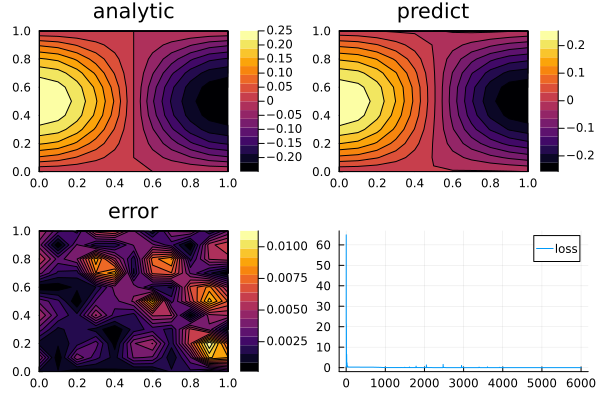

In [2]:
using Plots

ts,xs = [domain.domain.lower:dx:domain.domain.upper for domain in domains]
analytic_sol_func(t,x) =  sum([(8/(k^3*pi^3)) * sin(k*pi*x)*cos(C*k*pi*t) for k in 1:2:50000])

u_predict = reshape([first(phi([t,x],res.minimizer)) for t in ts for x in xs],(length(ts),length(xs)))
u_real = reshape([analytic_sol_func(t,x) for t in ts for x in xs], (length(ts),length(xs)))

diff_u = abs.(u_predict .- u_real)
p1 = plot(ts, xs, u_real, linetype=:contourf,title = "analytic");
p2 =plot(ts, xs, u_predict, linetype=:contourf,title = "predict");
p3 = plot(ts, xs, diff_u,linetype=:contourf,title = "error");
p4 = plot(loss, label="loss")
plot(p1,p2,p3, p4)